In [118]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import PIL
from PIL import Image 
import scipy as sy

# **Loading image and other preperations**

In [119]:
path = '/content/drive/MyDrive/msml_640/Yaaqob_Aisin_ASN1/'

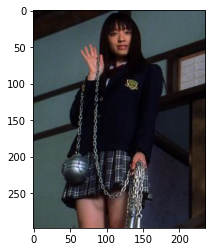

In [120]:
img = mpimg.imread('/content/drive/MyDrive/msml_640/inputPS0Q2.jpg')  
plt.imshow(img) #just showing the original image

In [121]:
img #seeing the image in matrix form

array([[[ 22,  12,  13],
        [ 21,  11,  12],
        [ 20,  10,  11],
        ...,
        [ 73,  94,  99],
        [ 73,  93, 100],
        [ 73,  93, 100]],

       [[ 20,  10,  11],
        [ 20,  10,  11],
        [ 19,   9,  10],
        ...,
        [ 70,  91,  96],
        [ 70,  90,  97],
        [ 70,  90,  97]],

       [[ 19,   9,  10],
        [ 19,   9,  10],
        [ 18,   8,   9],
        ...,
        [ 72,  92,  99],
        [ 72,  92,  99],
        [ 72,  92,  99]],

       ...,

       [[ 62,  81,  79],
        [ 62,  81,  79],
        [ 62,  81,  79],
        ...,
        [ 30,  19,  13],
        [ 34,  21,  15],
        [ 36,  23,  17]],

       [[ 61,  80,  78],
        [ 61,  80,  78],
        [ 61,  80,  78],
        ...,
        [ 34,  21,  15],
        [ 34,  21,  15],
        [ 35,  22,  16]],

       [[ 61,  80,  78],
        [ 61,  80,  78],
        [ 61,  80,  78],
        ...,
        [ 34,  21,  15],
        [ 34,  21,  15],
        [ 35,  22,  14]]

# **MSML 640, Assignment 1, Part 2, Problem 1-3**

In [122]:
# swapping green and red

red, green, blue= img.T 
data = np.array([green, red, blue])
data = data.transpose()
swap = Image.fromarray(data)


In [123]:
#grayscaling the image using Image in PIL
gray = Image.open('/content/drive/MyDrive/msml_640/inputPS0Q2.jpg').convert('LA')

In [124]:
#creating the negative-gray image
x = img[:,:,0]
invert_gray = 255-x

In [125]:
flip_x = np.flip(x,axis=1) #flipping image from left to right

In [126]:
x_avg=(x+flip_x)/len(x) #average the image with its flipped image

In [127]:
x.shape #seeing the shape of the image

(298, 236)

In [128]:
#setting up noises
N = np.random.rand(298,236)*255

np.save(path+'noise.mat(npy)',N)

In [129]:
#making the noised image and clipping it
N_x = np.clip(N+x,a_min=0,a_max=255)
N_x

array([[177.85433413, 223.59520089, 244.03340248, ..., 163.73918368,
        255.        , 122.04974792],
       [ 27.97262912,  78.48388262, 167.08942205, ..., 235.82009464,
        135.91392007, 190.85532905],
       [231.61416665,  75.63274384, 120.37785578, ..., 125.49717738,
        124.80695659, 255.        ],
       ...,
       [162.77762366, 255.        , 117.02290156, ...,  92.30722172,
        182.86326246, 116.48758705],
       [255.        , 246.22004252, 255.        , ..., 184.95640885,
        118.5573919 , 156.06539632],
       [219.14326623, 255.        , 195.69369   , ..., 246.60254479,
        201.20304042,  83.96346512]])

Text(0.5, 1.0, 'Grayscale w/ Noise')

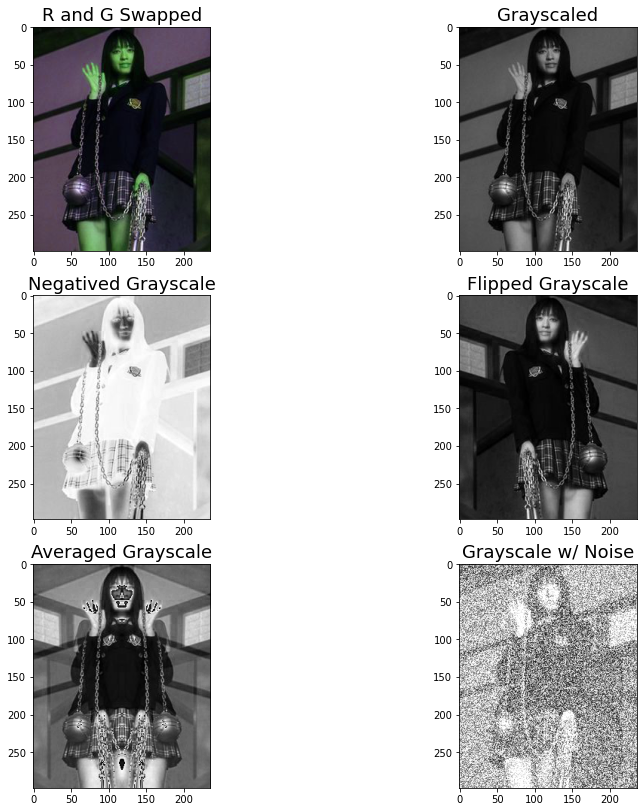

In [130]:
#plotting all the figures

fig, axes = plt.subplots(3, 2,figsize=(14,14))

axes[0,0].imshow(swap)
axes[0,0].set_title('R and G Swapped',fontsize=18)

axes[0,1].imshow(gray)
axes[0,1].set_title('Grayscaled',fontsize=18)

axes[1,0].imshow(invert_gray,cmap="gray")
axes[1,0].set_title('Negatived Grayscale',fontsize=18)

axes[1,1].imshow(flip_x,cmap="gray")
axes[1,1].set_title('Flipped Grayscale',fontsize=18)

axes[2,0].imshow(x_avg,cmap="gray")
axes[2,0].set_title('Averaged Grayscale',fontsize=18)

axes[2,1].imshow(N_x,cmap="gray")
axes[2,1].set_title('Grayscale w/ Noise',fontsize=18)


In [131]:
#saving all the figs
extent_1 = axes[0,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(path+'swapImgPS0Q2.png', bbox_inches=extent_1)

extent_2 = axes[0,1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(path+'grayImgPS0Q2.png', bbox_inches=extent_2)

extent_3 = axes[1,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(path+'negativeImgPS0Q2.png', bbox_inches=extent_3)

extent_4 = axes[1,1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(path+'mirrorImgPS0Q2.png', bbox_inches=extent_4)

extent_5 = axes[2,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(path+'avgImgPS0Q2.png', bbox_inches=extent_5)

extent_6 = axes[2,1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(path+'addNoiseImgPS0Q2.png', bbox_inches=extent_6)